In [271]:
import tensorflow as tf
import numpy as np

# **DATA PREPROCESSING**
1. Data reading
2. Data augmentation
3. Dataset splitting

In [272]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [273]:
"""train_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_gen = ImageDataGenerator(
    rescale=1.0 / 255
)"""

'train_gen = ImageDataGenerator(\n        rescale=1./255,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True)\n\ntest_gen = ImageDataGenerator(\n    rescale=1.0 / 255\n)'

In [274]:
ds_train = image_dataset_from_directory('train', batch_size=64)
ds_test = image_dataset_from_directory(
    'test',
)

Found 614 files belonging to 2 classes.
Found 612 files belonging to 2 classes.


In [275]:
type(ds_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [276]:
def resize_rescale(im, lbl):
    return tf.image.resize(im, (224, 224)) / 255.0, lbl

In [277]:
ds_train = ds_train.map(resize_rescale)
ds_test = ds_test.map(resize_rescale)

In [278]:
import matplotlib.pyplot as plt

In [279]:
def visualize_diff(image, augmented_img):
  plt.subplot(1, 2, 1)
  plt.title('Original Image: ')
  plt.imshow(image);

  plt.subplot(1, 2, 2)
  plt.title('Augmented Image: ')
  plt.imshow(augmented_img);

In [280]:
img_ = list(ds_train.take(1))[0][0][0]
augmented_img = tf.image.rot90(img_)

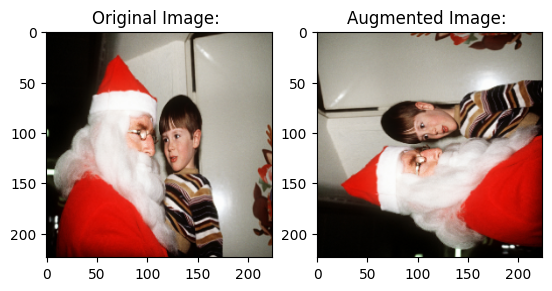

In [281]:
visualize_diff(img_, augmented_img)

tf.Tensor(1, shape=(), dtype=int32)


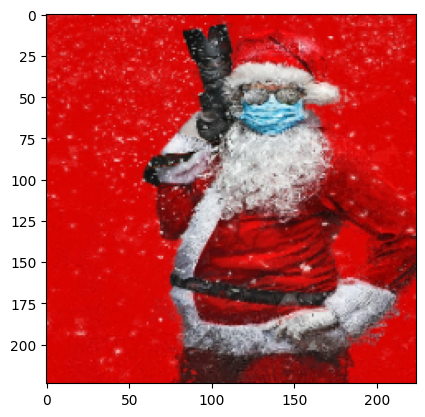

In [282]:
for img, lbl in ds_train.take(1):
    print(lbl[0])
    plt.imshow(img[0])
    break

In [283]:
# 1 - santa
# 0 - not santa

In [284]:
from tensorflow.keras import layers

In [285]:
data_augmentation = tf.keras.Sequential([
  layers.InputLayer(input_shape=(224, 224, 3)),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.5, 0.2)
])

In [286]:
model = tf.keras.Sequential([
  data_augmentation,
  layers.Conv2D(10, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(15, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(30, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),

  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(2, activation='sigmoid'),
])

In [287]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [288]:
hist = model.fit(
    ds_train,
    epochs=10,
    verbose=2,
    shuffle=True
)

Epoch 1/10


10/10 - 5s - loss: 0.7105 - accuracy: 0.5081 - 5s/epoch - 542ms/step
Epoch 2/10
10/10 - 4s - loss: 0.6835 - accuracy: 0.5244 - 4s/epoch - 408ms/step
Epoch 3/10
10/10 - 4s - loss: 0.6757 - accuracy: 0.5570 - 4s/epoch - 411ms/step
Epoch 4/10
10/10 - 4s - loss: 0.6722 - accuracy: 0.5619 - 4s/epoch - 405ms/step
Epoch 5/10
10/10 - 4s - loss: 0.6557 - accuracy: 0.5912 - 4s/epoch - 408ms/step
Epoch 6/10
10/10 - 4s - loss: 0.6165 - accuracy: 0.6645 - 4s/epoch - 408ms/step
Epoch 7/10
10/10 - 4s - loss: 0.5864 - accuracy: 0.7085 - 4s/epoch - 408ms/step
Epoch 8/10
10/10 - 4s - loss: 0.5719 - accuracy: 0.7231 - 4s/epoch - 409ms/step
Epoch 9/10
10/10 - 4s - loss: 0.5058 - accuracy: 0.7834 - 4s/epoch - 410ms/step
Epoch 10/10
10/10 - 4s - loss: 0.4687 - accuracy: 0.8046 - 4s/epoch - 407ms/step


In [289]:
from pathlib import Path
import imghdr

data_dir = "test"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [290]:
model.evaluate(ds_test)

20/20 [==============================] - 2s 56ms/step - loss: 0.5850 - accuracy: 0.6846


[0.5850017666816711, 0.6846405267715454]